## 군집 알고리즘

### 데이터 준비

In [1]:

#과일 데이터 준비 하기
#파일은 넘파이 파일로 저장되어있는 흑백사진


In [4]:
!pip install wget

  Stored in directory: C:\Users\82102\AppData\Local\pip\Cache\wheels\40\15\30\7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [10]:
import wget

In [13]:
!wget https://bit.ly/fruits_300 -O fruits_300.npy

'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [12]:
%conda install wget fastai

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - fastai
  - wget

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




## 아 코랩으로 가자!

## 코랩애서 불러온 파일 디렉토리 저장하고 넘파이로 불러오자 

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
fruits = np.load('fruits_300.npy')
#wget으로 안되니 파일을 주피터 안에 넣고 그대로 다운

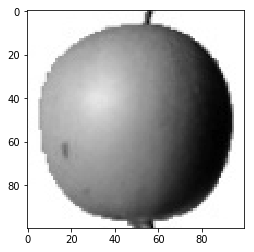

In [19]:
#흑백 반전
plt.imshow(fruits[0], cmap = 'gray_r')
plt.show()

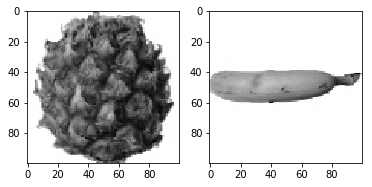

In [20]:
#바나나, 파인애플도 보까
fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100], cmap = 'gray_r')
axs[1].imshow(fruits[200], cmap = 'gray_r')
plt.show()
#처음 100개는 사과, 다음 100개 파인, 나머지 바나나

In [21]:
#fruits 배열에서 순서대로 100개씩 고르기 위해 슬라이싱 하자
#그리고 reshape로 두번째 차원, 셋째 차원 10000으로 합친다 -> 2차를 1차배열로 만드는 것
apple = fruits[0:100].reshape(-1, 100*100)
pineapple= fruits[100:200].reshape(-1, 100*100)
banana= fruits[200:300].reshape(-1, 100*100)

In [22]:
print(apple.mean(axis = 1)) #axis =1 -> x 축

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


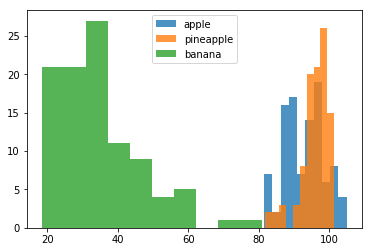

In [24]:
#시각화
plt.hist(np.mean(apple, axis = 1), alpha = 0.8) #alpha 변수는 투명도
plt.hist(np.mean(pineapple, axis = 1), alpha = 0.8)
plt.hist(np.mean(banana, axis = 1), alpha = 0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

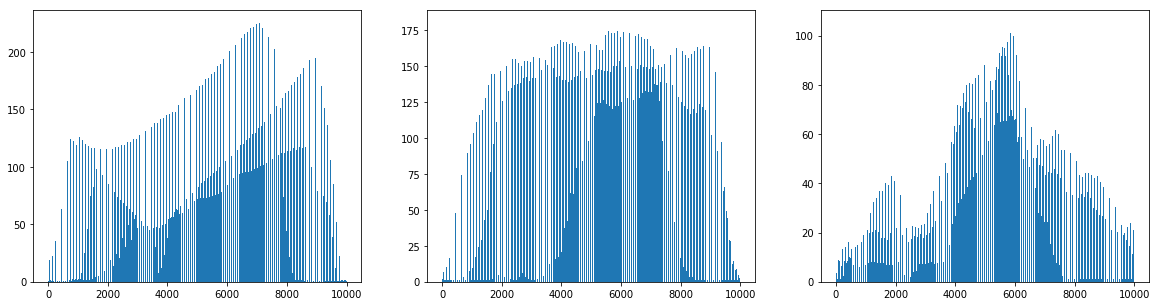

In [26]:
#이번엔 전체 샘플에 대해 각 픽셀의 평균을 계산해보자
fig, axs = plt.subplots(1,3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis = 0))
axs[1].bar(range(10000), np.mean(pineapple, axis = 0))
axs[2].bar(range(10000), np.mean(banana, axis = 0))
plt.show()

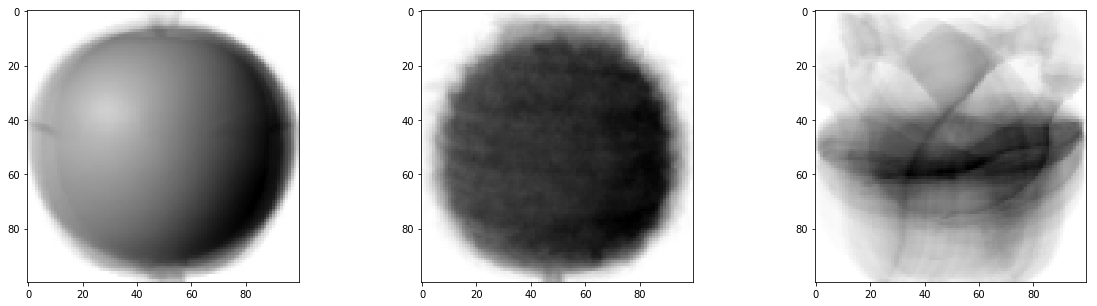

In [27]:
#이번엔 사진을 다시 2차원배열로 만들어서 픽셀 평균 낸 이미지를 모두 합쳐 보자
# 아 딱봐도 오래걸릴 것 같은..
apple_mean = np.mean(apple, axis = 0). reshape(100,100)
pineapple_mean = np.mean(pineapple, axis = 0). reshape(100,100)
banana_mean = np.mean(banana, axis = 0). reshape(100,100)
fig, axs = plt.subplots(1,3, figsize = (20,5))
axs[0].imshow(apple_mean, cmap = 'gray_r')
axs[1].imshow(pineapple_mean, cmap = 'gray_r')
axs[2].imshow(banana_mean, cmap = 'gray_r')
plt.show()
#엇 ㅇ바로나오ㅓ네?

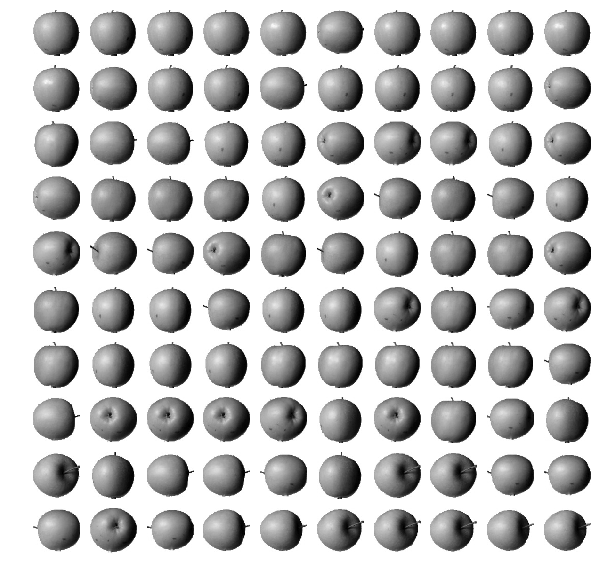

In [29]:
#abs 는 절대값 함수
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis = (1,2))
#평균과의 오차가 가장 작은것을 100개 골라보자
#argsort()는 작은것에서 큰 순서대로 나열한 인덱스를 반영
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize = (10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

## k-means 클러스터링

In [33]:
#아까 그 과일 데이터 
fruits_2d = fruits.reshape(-1, 100*100) #3차원 배열 2차원 변경

In [34]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters =3, random_state = 42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [35]:
print(np.unique(km.labels_, return_counts = True))

(array([0, 1, 2]), array([111,  98,  91], dtype=int64))


In [37]:
#사진 보자
def draw_fruits(arr, ratio=1):
    n = len(arr) #샘플개수
    #한줄에 10개씩 그릴거임, 그러니 10으로 나눠서 행개수 계산 해주자
    rows = int(np.ceil(n/10))
    #행이 1개면 열 개수는 샘플 개수다 , 그렇지 않으면 걍 10개
    cols= n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                           figsize = (cols *ratio, rows*ratio), squeeze =False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n: #n개만 그리자
                axs[i,j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

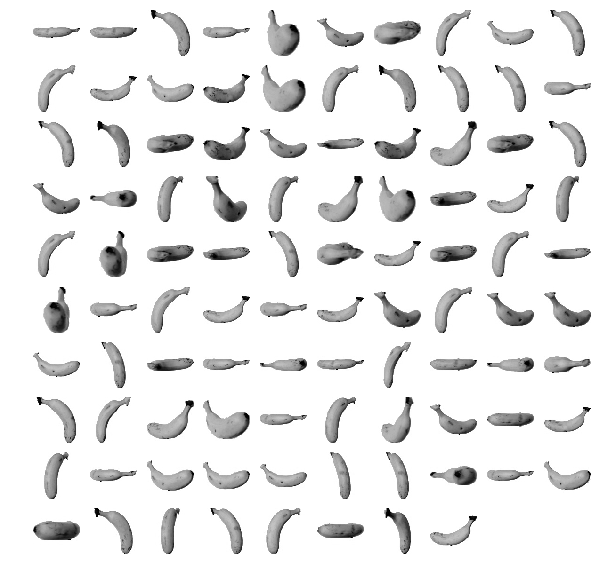

In [40]:
draw_fruits(fruits[km.labels_==1])

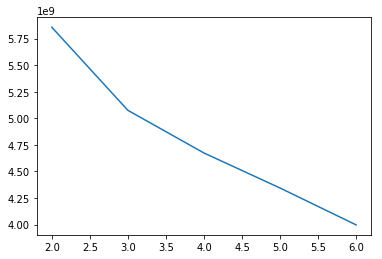

In [41]:
#이너셔 확인
inertia = []
for k in range(2,7):
    km = KMeans(n_clusters = k, random_state = 42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
plt.plot(range(2,7), inertia)
plt.show()

## 주성분 분석 (PCA)

In [42]:
#아까 과일 데이터 쓸거임
from sklearn.decomposition import PCA
pca = PCA(n_components =50) #주성분의 개수를 지정해줘야한다 
pca.fit(fruits_2d) #비지도학습이라 타겟데이터 없으니까 지정 안해줘도된다


PCA(n_components=50)

In [45]:
print(pca.components_.shape)

(50, 10000)


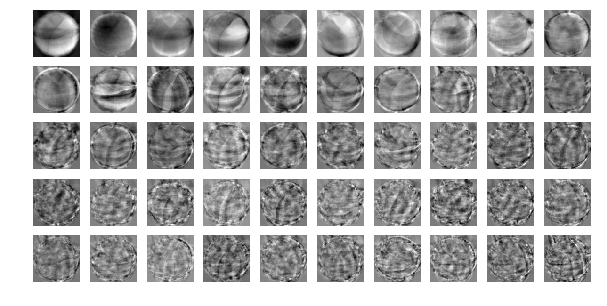

In [46]:
draw_fruits(pca.components_.reshape(-1,100,100))
#주성분을 100x100 크기의 이미지로 출력, 

In [47]:
# 주성분 50개로 정했으니까 원본데이터의 차원을 50개로 줄여보자
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [48]:
#원본데이터ㅏ 재구성
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


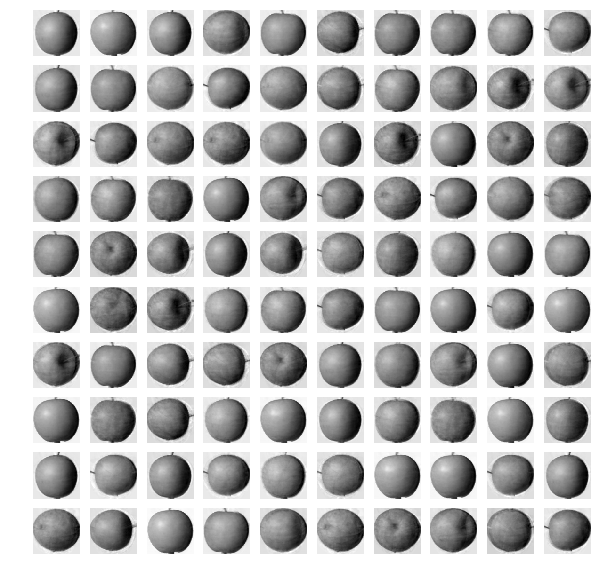

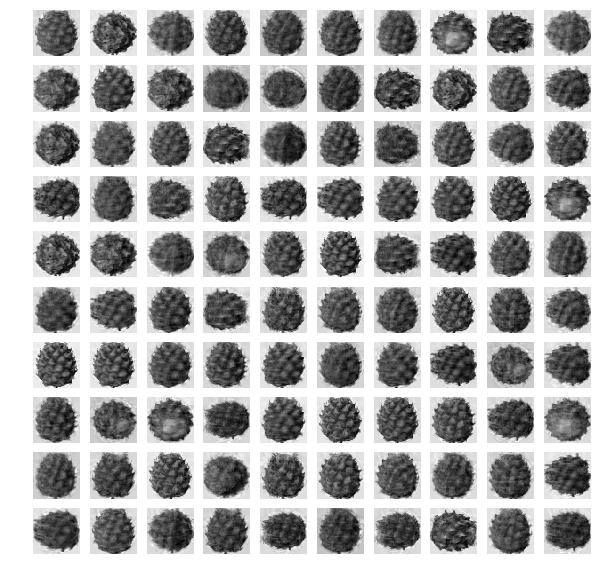

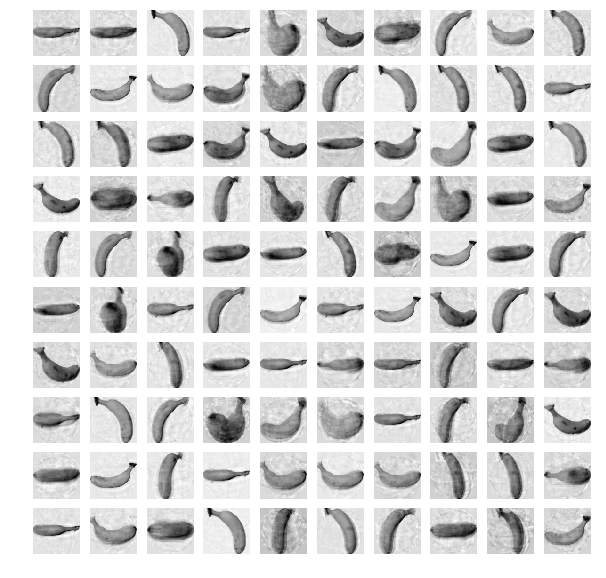

In [49]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100,100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [51]:
#설명된 분산
print(np.sum(pca.explained_variance_ratio_))

0.921547399506066


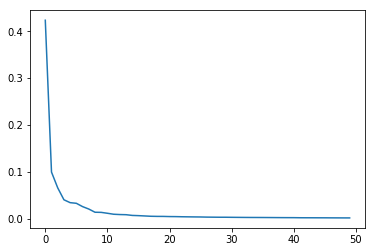

In [53]:
plt.plot(pca.explained_variance_ratio_)